<a href="https://colab.research.google.com/github/csnsnigdha18/Time-Series-Forecasting-and-Point-Anomaly-Detection-of-Sensor-Signals-Using-LSTM-Neural-Network-Arch/blob/main/Code/Bi-Directional_Lstm_for_Hydraulic_Sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/project/onesensorappending.csv')

In [ ]:
df=df1[0:13230]
df

,__sum_values,__median,__mean,__length,__standard_deviation,__variance,__maximum,__minimum,__sum_values.1,__median.1,...,__maximum.5,__minimum.5,__sum_values.6,__median.6,__mean.6,__length.6,__standard_deviation.6,__variance.6,__maximum.6,__minimum.6
0,93406.87,191.30,186.81374,500.0,9.772456,95.500903,191.51,150.69,625.370,125.390,...,0.611,0.603,10.465,0.0010,0.20930,50.0,1.262012,1.592676,8.990,0.000
1,93954.08,191.30,187.90816,500.0,9.297784,86.448781,191.47,150.62,623.760,125.060,...,0.626,0.590,10.521,0.0010,0.21042,50.0,1.253012,1.570040,8.919,0.000
2,93891.47,191.20,187.78294,500.0,9.356305,87.540451,191.41,150.23,624.310,125.130,...,0.652,0.578,10.481,0.0010,0.20962,50.0,1.286877,1.656052,9.179,0.000
3,93834.72,191.15,187.66944,500.0,9.472854,89.734966,191.34,149.98,622.820,124.920,...,0.623,0.565,10.436,0.0010,0.20872,50.0,1.267433,1.606386,9.034,0.000
4,93797.21,191.11,187.59442,500.0,9.532093,90.860794,191.41,149.71,622.000,124.660,...,0.644,0.570,9.962,0.0010,0.19924,50.0,1.223985,1.498140,8.729,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,79089.09,156.58,158.17818,500.0,3.542096,12.546447,166.84,156.34,12.875,2.562,...,0.551,0.544,379.627,7.8270,7.59254,50.0,0.871969,0.760330,8.041,2.889
13226,79048.26,156.49,158.09652,500.0,3.531546,12.471815,166.85,156.27,14.334,2.812,...,0.555,0.540,379.893,7.8425,7.59786,50.0,0.859710,0.739101,8.040,2.828
13227,79054.75,156.50,158.10950,500.0,3.520845,12.396346,166.84,156.31,12.500,2.500,...,0.571,0.541,379.289,7.8300,7.58578,50.0,0.862509,0.743921,8.062,2.848
13228,79075.67,156.55,158.15134,500.0,3.508837,12.311934,166.83,156.31,13.913,2.742,...,0.546,0.534,379.506,7.8260,7.59012,50.0,0.856336,0.733312,8.039,2.891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13230 entries, 0 to 13229
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   __sum_values            13230 non-null  float64
 1   __median                13230 non-null  float64
 2   __mean                  13230 non-null  float64
 3   __length                13230 non-null  float64
 4   __standard_deviation    13230 non-null  float64
 5   __variance              13230 non-null  float64
 6   __maximum               13230 non-null  float64
 7   __minimum               13230 non-null  float64
 8   __sum_values.1          13230 non-null  float64
 9   __median.1              13230 non-null  float64
 10  __mean.1                13230 non-null  float64
 11  __length.1              13230 non-null  float64
 12  __standard_deviation.1  13230 non-null  float64
 13  __variance.1            13230 non-null  float64
 14  __maximum.1             13230 non-null

In [ ]:
train=df.iloc[:10969]
test=df.iloc[10969:]
train.shape
test.shape

(2261, 56)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
win_length=2205
batch_size=32
num_features=56
train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=56,sampling_rate=1,batch_size=2205)
test_generator = TimeseriesGenerator(scaled_test,scaled_test,length=56,sampling_rate=1,batch_size=2205)

In [ ]:
X,y=train_generator[0]
print(f'input array:\n{X.flatten()}')
print(f'output array:\n{y}')

input array:
[0.92970522 0.99605805 0.92970522 ... 0.87260121 1.         0.        ]
output array:
[[0.91771499 0.9774234  0.91771499 ... 0.04139055 0.34496284 0.        ]
 [0.91776674 0.9774234  0.91776674 ... 0.04072672 0.34119529 0.        ]
 [0.91808967 0.9774234  0.91808967 ... 0.04074154 0.34145334 0.        ]
 ...
 [0.93386514 0.97724422 0.93386514 ... 0.84114396 1.         0.        ]
 [0.93356826 0.97688586 0.93356826 ... 0.87260121 1.         0.        ]
 [0.93358955 0.97688586 0.93358955 ... 0.93054993 1.         0.        ]]


In [ ]:
print(f'output array:\n{y}')

output array:
[[0.91771499 0.9774234  0.91771499 ... 0.04139055 0.34496284 0.        ]
 [0.91776674 0.9774234  0.91776674 ... 0.04072672 0.34119529 0.        ]
 [0.91808967 0.9774234  0.91808967 ... 0.04074154 0.34145334 0.        ]
 ...
 [0.93386514 0.97724422 0.93386514 ... 0.84114396 1.         0.        ]
 [0.93356826 0.97688586 0.93356826 ... 0.87260121 1.         0.        ]
 [0.93358955 0.97688586 0.93358955 ... 0.93054993 1.         0.        ]]


In [ ]:
X.shape

(2205, 56, 56)

In [ ]:
y.shape

(2205, 56)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True), input_shape = (win_length,num_features)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Bidirectional(LSTM(64,return_sequences=False)))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(56))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 2205, 256)        189440    
 onal)                                                           
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 2205, 256)         0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 2205, 256)        394240    
 onal)                                                           
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 2205, 256)         0         
                                                                 
 bidirectional_14 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                      

In [ ]:
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics = ['accuracy','mae'])
history = model.fit(train_generator,epochs=500,validation_data=test_generator,shuffle=False)

Epoch 1/500
5/5 [==============================] - 14s 835ms/step - loss: 0.1239 - accuracy: 0.0014 - mae: 0.2389 - val_loss: 0.0627 - val_accuracy: 0.0000e+00 - val_mae: 0.1746
Epoch 2/500
5/5 [==============================] - 1s 206ms/step - loss: 0.0583 - accuracy: 0.0467 - mae: 0.1734 - val_loss: 0.0415 - val_accuracy: 0.0045 - val_mae: 0.1288
Epoch 3/500
5/5 [==============================] - 1s 208ms/step - loss: 0.0333 - accuracy: 0.0110 - mae: 0.1354 - val_loss: 0.0344 - val_accuracy: 0.0063 - val_mae: 0.1147
Epoch 4/500
5/5 [==============================] - 1s 209ms/step - loss: 0.0215 - accuracy: 0.1222 - mae: 0.1054 - val_loss: 0.0298 - val_accuracy: 0.2853 - val_mae: 0.0934
Epoch 5/500
5/5 [==============================] - 1s 207ms/step - loss: 0.0172 - accuracy: 0.1847 - mae: 0.0912 - val_loss: 0.0288 - val_accuracy: 0.5619 - val_mae: 0.0862
Epoch 6/500
5/5 [==============================] - 1s 206ms/step - loss: 0.0140 - accuracy: 0.1208 - mae: 0.0791 - val_loss: 0.028

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'mae', 'val_loss', 'val_accuracy', 'val_mae'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

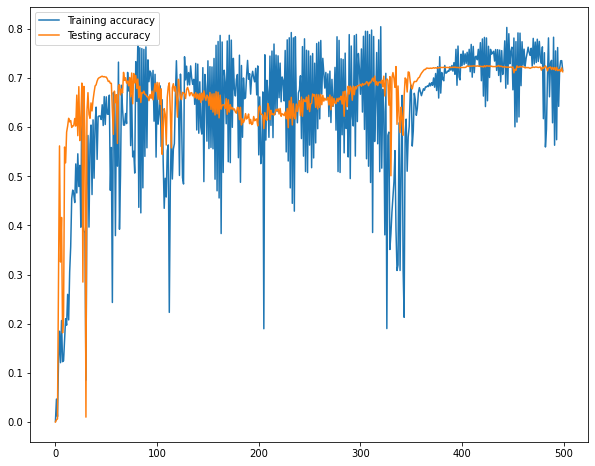

In [ ]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc,label='Testing accuracy')
plt.legend()
plt.show()

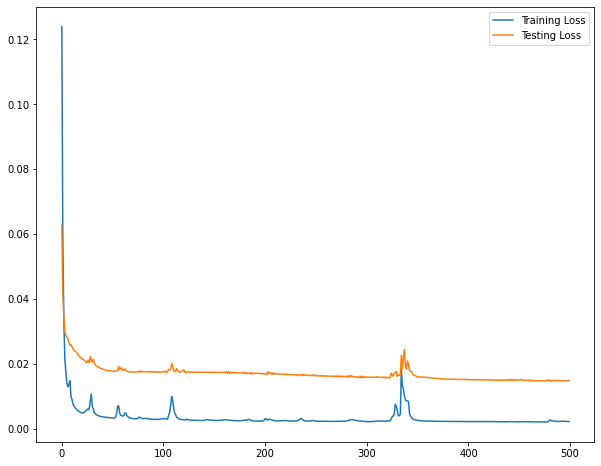

In [ ]:
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss,label='Testing Loss')
plt.legend()
plt.show()

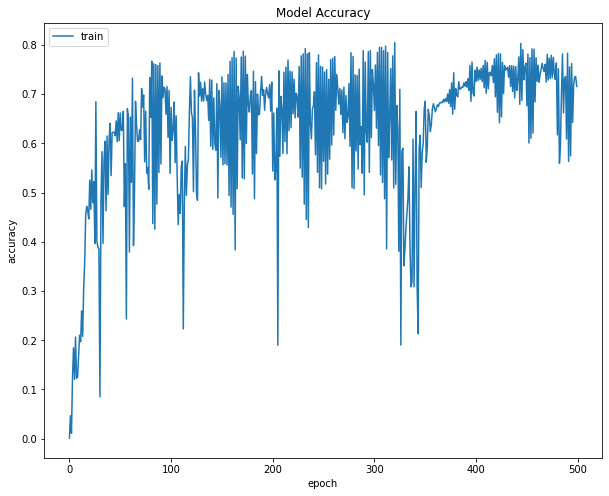

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

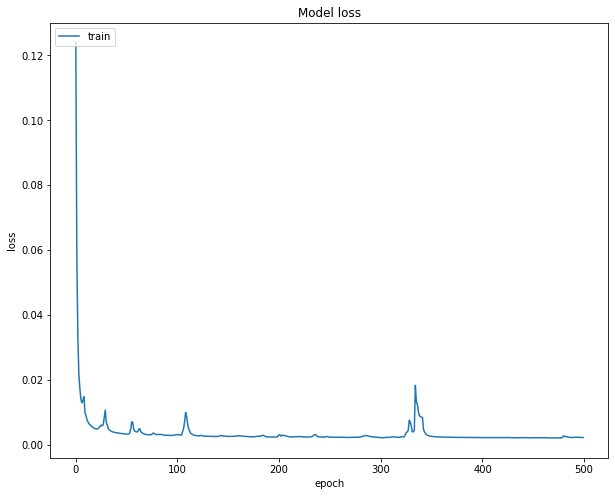

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
model.evaluate(test_generator,verbose=0)

[0.014787344262003899, 0.7129251956939697, 0.05170290172100067]

In [ ]:
predictions=model.predict(test_generator)

In [ ]:
predictions

array([[ 0.35912058,  0.36142635,  0.35865468, ..., -0.00330006,
         0.3527485 ,  0.95878464],
       [ 0.3383354 ,  0.33287436,  0.35031703, ...,  0.01855742,
         0.39566484,  0.91984576],
       [ 0.3184584 ,  0.30451414,  0.3391649 , ...,  0.04066985,
         0.45008215,  0.86767274],
       ...,
       [ 0.24876761,  0.2411813 ,  0.25197378, ..., -0.0103838 ,
         0.34844112,  0.4745969 ],
       [ 0.23984396,  0.23344143,  0.2427845 , ..., -0.00539088,
         0.35817802,  0.4494337 ],
       [ 0.23523672,  0.22897442,  0.23659328, ..., -0.00396011,
         0.36212793,  0.43668228]], dtype=float32)

In [ ]:
predictions.shape

(2205, 56)

In [ ]:
df1= pd.DataFrame(predictions)
df1

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.359121,0.361426,0.358655,-0.006297,0.006393,0.008604,0.284431,0.403364,0.035792,0.031688,...,0.024336,0.041731,0.901943,0.945826,0.904192,0.002178,0.016478,-0.003300,0.352749,0.958785
1,0.338335,0.332874,0.350317,-0.009087,0.063088,0.023663,0.318061,0.378537,0.038276,0.042828,...,0.026887,0.040043,0.921923,0.963476,0.926112,0.005505,0.065407,0.018557,0.395665,0.919846
2,0.318458,0.304514,0.339165,-0.008480,0.113447,0.041523,0.350296,0.353585,0.042788,0.056250,...,0.026480,0.041432,0.932356,0.977368,0.940688,0.004526,0.122661,0.040670,0.450082,0.867673
3,0.286911,0.293721,0.320971,-0.011985,0.177902,0.063289,0.341737,0.308942,0.034843,0.025838,...,0.033773,0.045058,0.913312,0.995497,0.935342,-0.002998,0.140077,0.034948,0.400600,0.672695
4,0.269630,0.298422,0.298347,-0.030387,0.148676,0.067039,0.304455,0.321959,0.008560,0.028577,...,0.046291,0.048449,0.928313,1.004167,0.901780,-0.001627,0.077589,0.004210,0.339503,0.605778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.254970,0.247773,0.265124,0.006012,0.247070,0.088194,0.287823,0.281871,0.011921,0.055192,...,0.020848,0.025051,0.855171,0.976422,0.885067,0.003481,0.103007,-0.006804,0.347570,0.494822
2201,0.245691,0.239582,0.255023,0.007527,0.262723,0.091977,0.289026,0.281132,0.014442,0.055906,...,0.016943,0.022867,0.856770,0.973483,0.879106,0.000457,0.113954,-0.005513,0.356142,0.478972
2202,0.248768,0.241181,0.251974,0.007525,0.259082,0.090824,0.288853,0.283201,0.014117,0.055667,...,0.017729,0.022033,0.863288,0.975539,0.878958,0.000243,0.108556,-0.010384,0.348441,0.474597
2203,0.239844,0.233441,0.242785,0.006539,0.268297,0.089723,0.290577,0.278081,0.018670,0.053900,...,0.015356,0.019357,0.864929,0.970224,0.877515,-0.002179,0.120392,-0.005391,0.358178,0.449434


In [ ]:
rev_trans = scaler.inverse_transform(df1)

In [ ]:
df_final=pd.DataFrame(rev_trans)
df_final

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,77858.140625,155.881195,155.690872,499.993713,0.129244,1.094676,155.876770,155.367462,32.451668,5.851212,...,0.546863,0.525565,386.899200,7.795496,7.756843,50.002178,0.094132,-0.095409,7.937855,7.592616
1,77291.726562,154.287720,155.236465,499.990906,0.764514,3.004681,157.570755,153.998734,34.487011,7.685865,...,0.552092,0.523844,395.278809,7.940972,7.940710,50.005505,0.356988,0.536725,8.769403,7.284258
2,76750.070312,152.704926,154.628662,499.991516,1.328770,5.270158,159.194397,152.623169,38.182869,9.896106,...,0.551258,0.525260,399.654388,8.055470,8.062973,50.004524,0.664570,1.176233,9.823792,6.871100
3,75890.398438,152.102554,153.637070,499.988007,2.050984,8.030849,158.763275,150.162003,31.674318,4.888005,...,0.566201,0.528959,391.667175,8.204883,8.018128,49.997002,0.758131,1.010743,8.865018,5.327073
4,75419.484375,152.364914,152.404037,499.969604,1.723507,8.506507,156.885406,150.879608,10.144534,5.338961,...,0.591850,0.532417,397.958801,8.276343,7.736612,49.998371,0.422432,0.121784,7.681208,4.797157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,75019.968750,149.538193,150.593369,500.006012,2.825999,11.189906,156.047623,148.669571,12.898047,9.721927,...,0.539718,0.508552,367.282959,8.047671,7.596423,50.003483,0.558983,-0.196734,7.837510,3.918497
2201,74767.132812,149.081070,150.042831,500.007538,3.001385,11.669672,156.108246,148.628815,14.962829,9.839357,...,0.531716,0.506324,367.953552,8.023443,7.546428,50.000458,0.617791,-0.159421,8.003606,3.792978
2202,74850.960938,149.170334,149.876648,500.007538,2.960593,11.523478,156.099518,148.742874,14.696574,9.800062,...,0.533327,0.505474,370.687256,8.040390,7.545185,50.000244,0.588792,-0.300275,7.854395,3.758333
2203,74607.781250,148.738373,149.375839,500.006531,3.063846,11.383739,156.186340,148.460587,18.426308,9.509062,...,0.528465,0.502744,371.375519,7.996590,7.533084,49.997822,0.652377,-0.155877,8.043057,3.559066


In [ ]:
df_final.shape

(2205, 56)

In [ ]:
df_final.to_csv("bi-lstm_500 new code.csv")